### Problem Statement
- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Business Objective
- Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.
    - Which variables are significant in predicting the demand for shared bikes.
    - How well those variables describe the bike demands

### Importing the libraries

In [1]:
import pandas as pd                                                               #Reading the data
import numpy as np                                                                #numeric operations
import matplotlib.pyplot as plt                                                   #plotting
import seaborn as sns                                                           
from sklearn.linear_model import LinearRegression                                 #Regression model
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler                                    #Scaling
from sklearn.model_selection import train_test_split                              #Splitting the data
from sklearn.feature_selection import RFE                                         #For getting improtant features
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error                          #Error Metrics
import warnings                                                                   #Ignoring warnings
warnings.filterwarnings("ignore")

### Importing the data

In [2]:
df = pd.read_csv("day.csv")
print("The dataset on daily bike demands across the American market based having\033[1m",df.shape[0],"rows and",df.shape[1],"features")

The dataset on daily bike demands across the American market based having 730 rows and 16 features


### Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations
- The data contains 16 features of which, float64(4), int64(11) and object(1) variables
- The data not contains any missing values

In [4]:
pd.DataFrame(df.nunique()).rename(columns={0:"Unique Count"}).sort_values(by="Unique Count").T

,yr,holiday,workingday,weathersit,season,weekday,mnth,temp,hum,casual,windspeed,registered,atemp,cnt,instant,dteday
Unique Count,2,2,2,3,4,7,12,498,594,605,649,678,689,695,730,730


#### Observations
- Instant and dteday variables have no duplicate entries
- Categorical variables 
    - __yr:__ year (0: 2018, 1:2019) - 2 entries
    - __holiday:__ weather day is a holiday or not - 2 entries
    - __workingday:__ if day is neither weekend nor holiday is 1 otherwise is 0 - 2 entries
    - __weathersit:__ (3 entries)
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - __season:__ season (1:spring, 2:summer, 3:fall, 4:winter) - 4 entries
    - __weekday:__ day of the week - 7 entries
    - __mnth:__ month ( 1 to 12) - 12 entries
- Numerical variables
    - __temp:__ temperature in Celsius
	- __atemp:__ feeling temperature in Celsius
	- __hum:__ humidity
	- __windspeed:__ wind speed
	- __casual:__ count of casual users
	- __registered:__ count of registered users
    - __instant:__ record index
	- __cnt:__ count of total rental bikes including both casual and registered
- Date Type
    - __dteday:__ date

In [5]:
df.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959


In [6]:
#### Mapping variable entries with appropriate names
year_mapping = {0: 2018, 1:2019}
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
weekday_mapping = {0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday',6:'Monday'}

df['yr'] = df['yr'].map(year_mapping)
df['season'] = df['season'].map(season_mapping)
df['weekday'] = df['weekday'].map(weekday_mapping)

In [7]:
# Convering dteday variable into date format
df['dteday'] = pd.to_datetime(df['dteday'], format="%d-%m-%Y")

In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# Dropping instant and dteday variables, as these variables not need for our analysis
df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [10]:
# Descriptive statistics
df[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [11]:
# Creating bins for feeling temperature in Celsius
df['feeling temp bins'] = pd.cut(df['atemp'], bins=[0,10,20,30,40], labels=["Very Low","Low","Medium", "High"])
df['humidity bins'] = pd.cut(df['hum'], bins=[0,25,50,75,100], labels=["Low","Medium", "High","Very High"])
df['windspeed bins'] = pd.cut(df['windspeed'], bins=[0,10,20,30,40], labels=["Very Low","Low","Medium", "High"])

### Univariate Analysis

In [12]:
categorical_var_list = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit','feeling temp bins','humidity bins','windspeed bins']

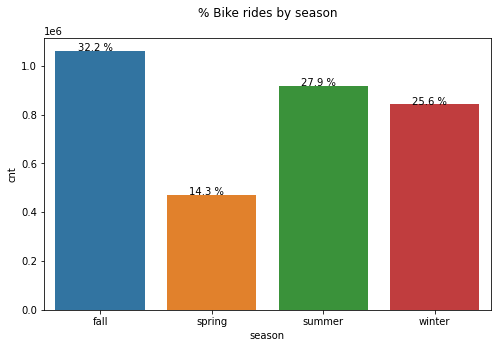

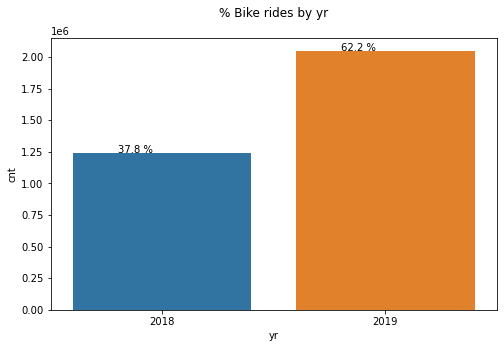

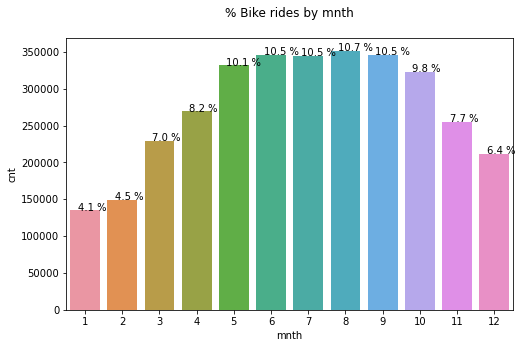

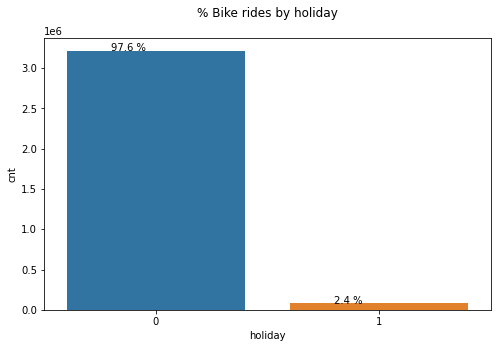

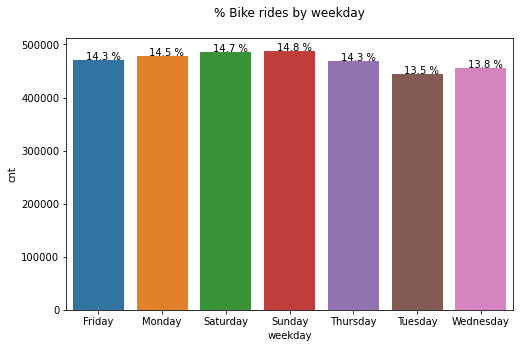

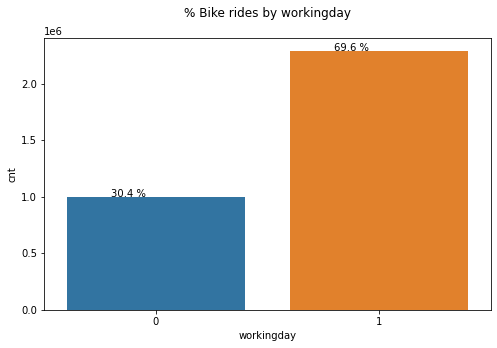

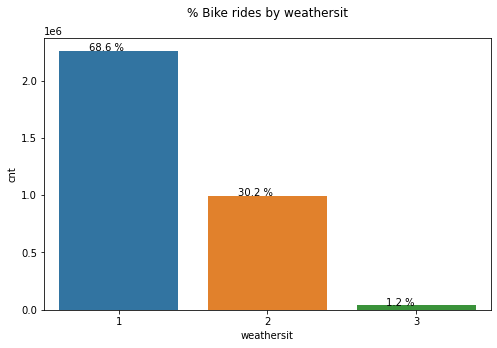

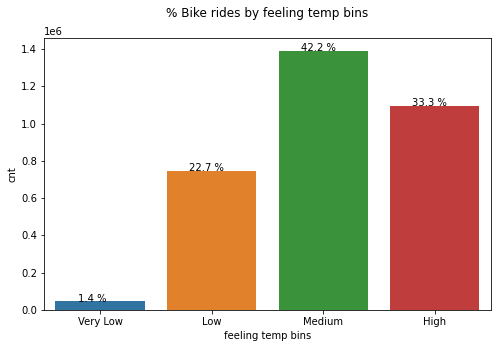

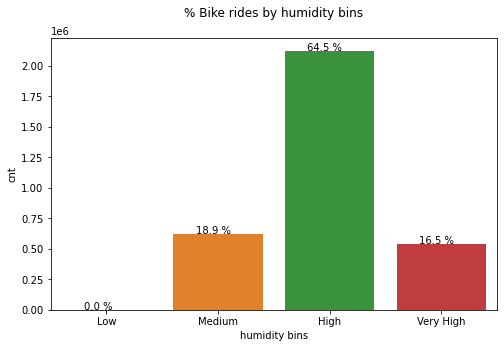

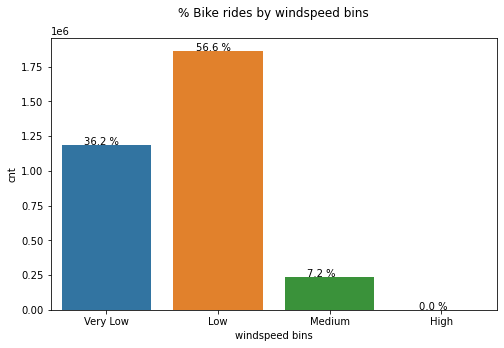

In [13]:
# Over all rides
for i in categorical_var_list:
    plt.figure(figsize=(8,5))
    plt.title("% Bike rides by "+i+"\n")
    plt.xticks(rotation=0)
    x = df[[i,'cnt']].groupby(i).sum().reset_index()
    ax = sns.barplot(x[i], x['cnt'])
    for p in ax.patches:
        ax.annotate('{:,.1f} %'.format(p.get_height()/sum(df['cnt'])*100), (p.get_x()+0.2, p.get_height()+0.1))
    plt.show()

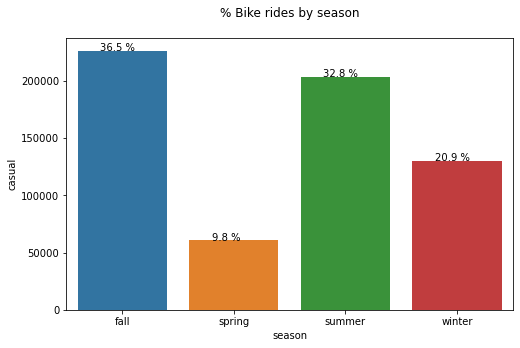

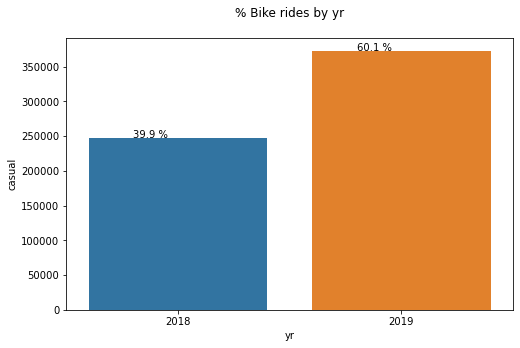

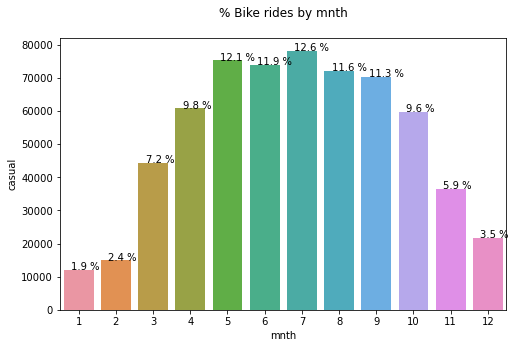

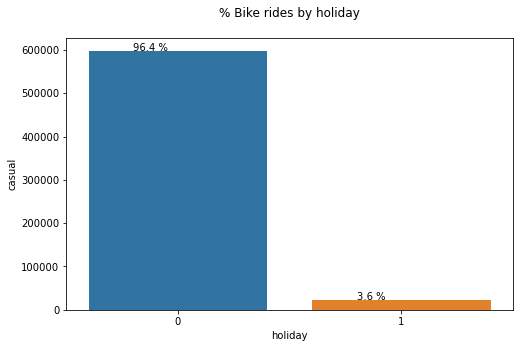

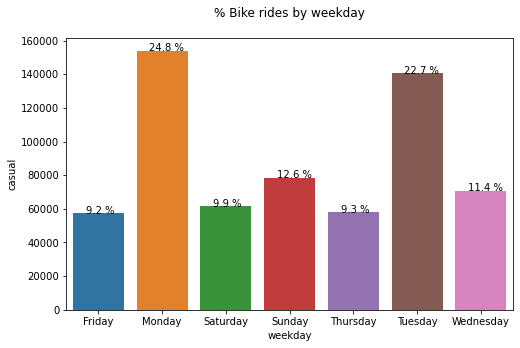

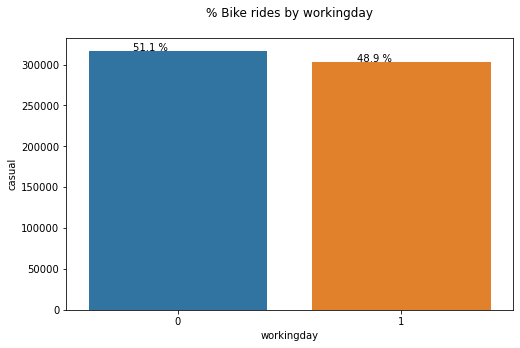

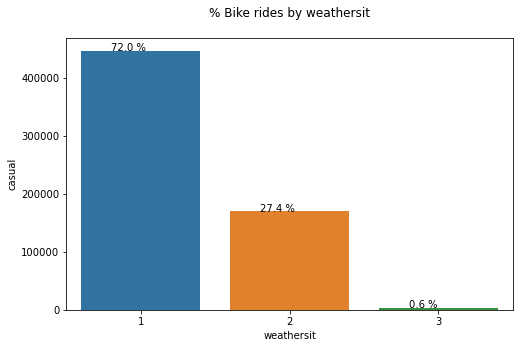

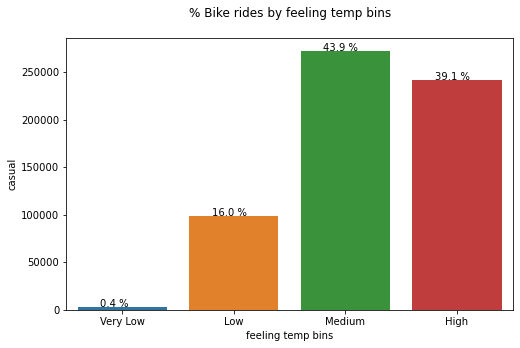

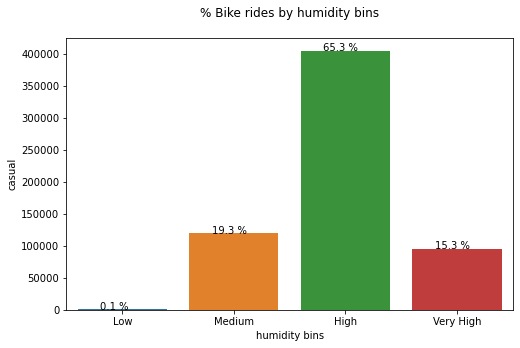

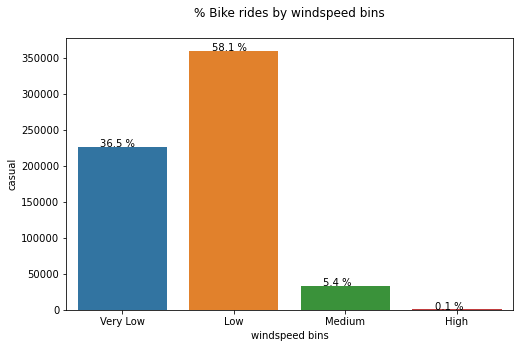

In [14]:
# Casual all rides
for i in categorical_var_list:
    plt.figure(figsize=(8,5))
    plt.title("% Bike rides by "+i+"\n")
    plt.xticks(rotation=0)
    x = df[[i,'casual']].groupby(i).sum().reset_index()
    ax = sns.barplot(x[i], x['casual'])
    for p in ax.patches:
        ax.annotate('{:,.1f} %'.format(p.get_height()/sum(df['casual'])*100), (p.get_x()+0.2, p.get_height()+0.1))
    plt.show()

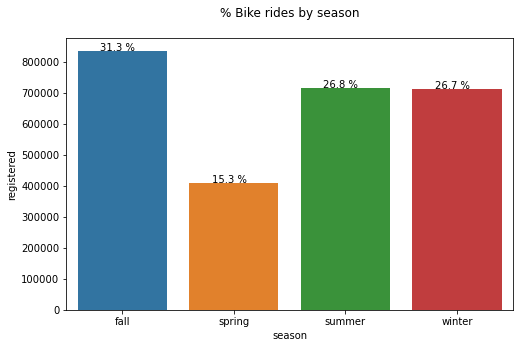

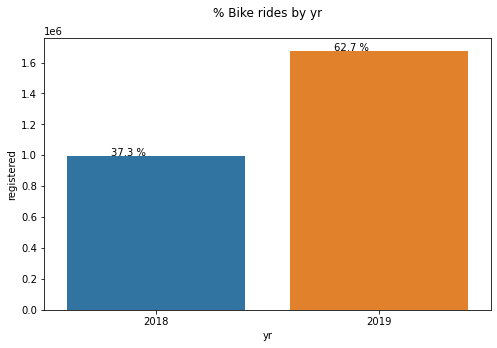

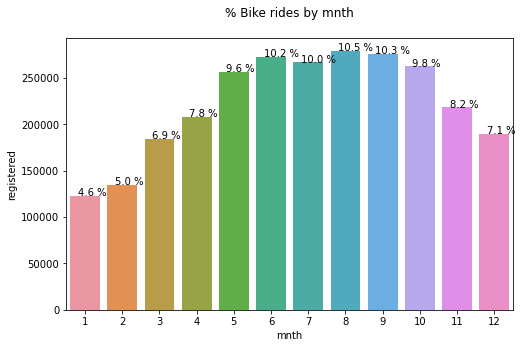

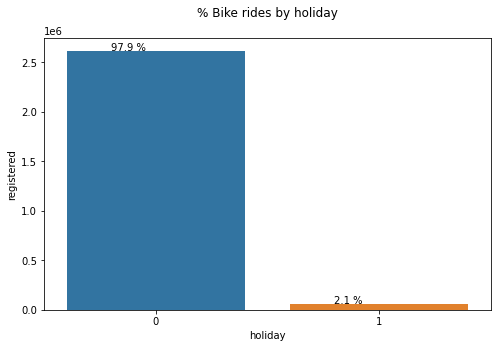

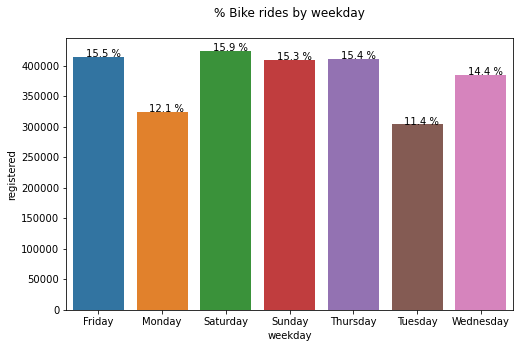

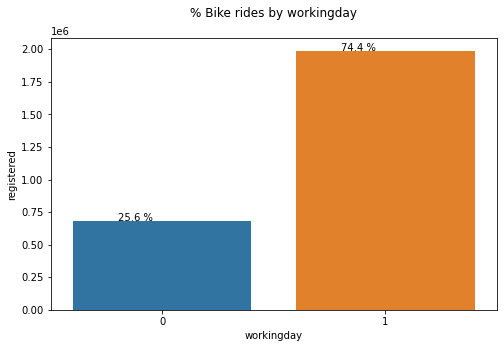

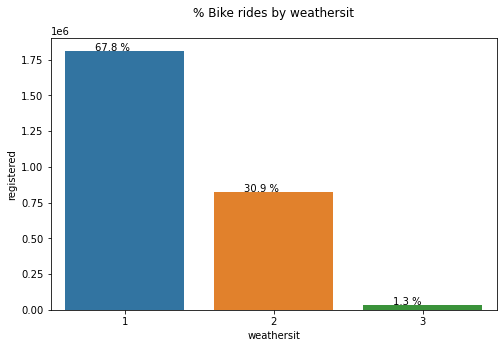

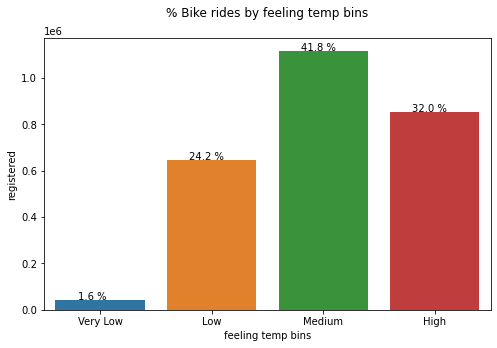

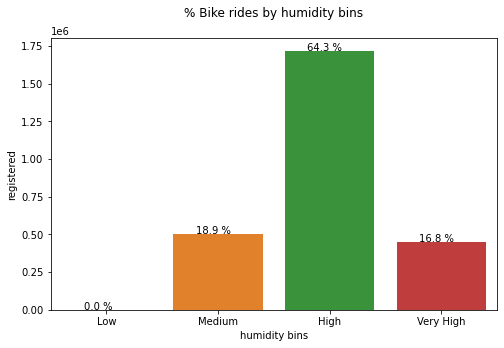

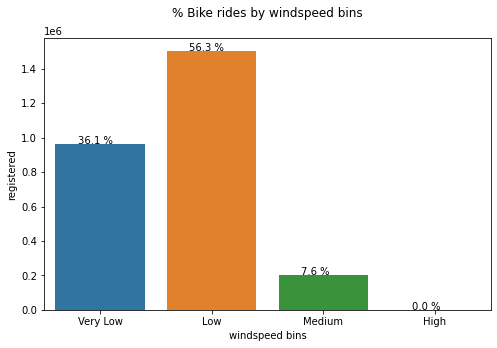

In [15]:
# Registered all rides
for i in categorical_var_list:
    plt.figure(figsize=(8,5))
    plt.title("% Bike rides by "+i+"\n")
    plt.xticks(rotation=0)
    x = df[[i,'registered']].groupby(i).sum().reset_index()
    ax = sns.barplot(x[i], x['registered'])
    for p in ax.patches:
        ax.annotate('{:,.1f} %'.format(p.get_height()/sum(df['registered'])*100), (p.get_x()+0.2, p.get_height()+0.1))
    plt.show()

#### Observations
- Total Rides
    - __~60 %__ people preferred  rides during fall and summer whereas the least preferred  season for riding is spring (14%)
    - __1.6X__ growth in 2019 compared to 2018
    - Highest bike engagement happened during mid of the year (May to Oct __~60 %__)
    - __97 %__ of the total rental bikes are during non holiday period
    - Most of all the days people prefer riding
    - __~3/4th__ of the bikes are due to work day
    - __70 %__ of the riders prefer to ride in Clear weather (Few clouds, Partly cloudy, Partly cloudy)
    - __~40 %__ of the rides are during __medium__ feeling temperature (20-30 C)
    - __65 %__ of bike sharing during __(50-75)__ humidity range
    - __90+ %__ of bike sharing in low wind speed (<20)
    - In __Jan and Feb__ we can suggest to service the bikes, with out much impacting the business
     
- Casual Rides
    - __~50 %__ of the bike engagement are on Monday and Tuesday
    - Working day don't have any effect on casual rides

- Registered Rides
    - Registered riders don't want to ride on Monday and Tuesday, least rides amoung other days

### Check - Presence of Outliers

In [16]:
# numeric_variables = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',]
# for i in numeric_variables:
#     print("                                                    Variable : ",i)
#     print("----------------------------------------------------------------------------------------------------------------")
#     plt.figure(figsize=(20,5))
#     plt.subplot(1,3,1)
#     p1 = sns.distplot(df[i], rug=True)
#     plt.subplot(1,3,2)
#     p2 =sns.boxplot(df[i], orient="V")
#     print("Descriptive statistics : ")
#     print("----------------------------")
#     print(round(pd.DataFrame(df[i].describe()).T))
#     print("----------------------------------------------------------------------------------------------------------------")
#     plt.show()
#     print("================================================================================================================")

#### Observations
- Humidity has outliers in lower edges - Very less count
- Wind speed has some outliers in upper end
- Casuals have little more outliers in the upper end, as per business objective, we will not be considering this variable for our analysis

### Handling Outliers

In [17]:
# # outlier_variables = ['hum', 'windspeed']
# for i in outlier_variables:
#     q3 = df[i].quantile(.75)
#     q1 = df[i].quantile(.25)
#     q10 = df[i].quantile(.1)
#     q90 = df[i].quantile(.9)
#     iqr = q3-q1
#     upper_limit = q3+(1.5*iqr)
#     lower_limit = q1-(1.5*iqr)
#     df[i]  = np.where(df[i]>upper_limit ,q90, np.where(df[i]<lower_limit, q10, df[i]))

In [18]:
# for i in outlier_variables:
#     print("                                                    Variable : ",i)
#     print("----------------------------------------------------------------------------------------------------------------")
#     plt.figure(figsize=(20,5))
#     plt.subplot(1,3,1)
#     p1 = sns.distplot(df[i], rug=True)
#     plt.subplot(1,3,2)
#     p2 =sns.boxplot(df[i], orient="V")
#     print("Descriptive statistics : ")
#     print("----------------------------")
#     print(round(pd.DataFrame(df[i].describe()).T))
#     print("----------------------------------------------------------------------------------------------------------------")
#     plt.show()
#     print("================================================================================================================")

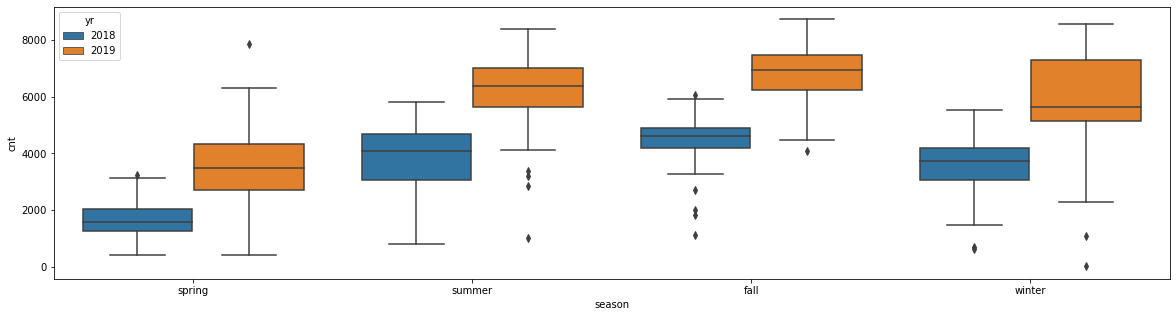

In [19]:
plt.figure(figsize=(20,5))
sns.boxplot(x='season', y='cnt', hue='yr', data=df)
plt.show()

### Observation:
- In all the seasons of 2019 the number of bikes are more compared to last year
- Lowest bikes recorded in the 2019-winter season

### Dropping unnessesory variables:
- As casual and registered are inclusive in the cnt variable and the objective here is to work on total bike sharing than categories, so dropping these variable

In [20]:
df.drop(['casual','registered','feeling temp bins', 'humidity bins','windspeed bins'], axis=1, inplace=True)

### Variable Conversion:

In [21]:
cat_list = ['season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in cat_list:
    df[i] = df[i].astype('object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


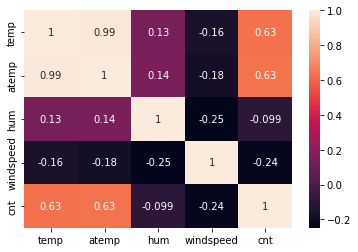

In [23]:
sns.heatmap(df.corr(), annot=True);

### Observation:
- As temp and atemp tells the same story, with very minute difference. Dropping temp variable to avoid multi-colliniarity
- Keeping atemp - feeling temperature, because as the rides depends on the feeling temperature of the customers depending on customers body nature

In [24]:
df.drop(['temp'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [26]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,Monday,0,2,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,Tuesday,0,2,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,Wednesday,1,1,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,Thursday,1,1,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,Friday,1,1,11.46350,43.6957,12.522300,1600


### Dummy variable creation: Convering categorical variables into numeric representations

In [27]:
# Setting options to display max no. of columns
pd.options.display.max_columns = 50
df_modified = pd.get_dummies(df, drop_first=True)
print("Shape of the data post dummy variable creation:",df_modified.shape)
df_modified.head(3).append(df_modified.tail(3))

Shape of the data post dummy variable creation: (730, 29)


,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_2,weathersit_3
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
727,12.12000,75.2917,8.333661,1341,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
728,11.58500,48.3333,23.500518,1796,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
729,11.17435,57.7500,10.374682,2729,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0


### Splitting the data into train and test sets

In [28]:
np.random.seed(111)
df_train, df_test = train_test_split(df_modified, test_size=0.3, random_state=111)
print("Shape of the training dataset:",df_train.shape)
print("Shape of the testing dataset:",df_test.shape)

Shape of the training dataset: (511, 29)
Shape of the testing dataset: (219, 29)


### Scaling the data using - MinMaxScaler()

In [29]:
scaler = MinMaxScaler()
var_to_scale = ['atemp','hum','windspeed','cnt']
# Training Data
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])
y_train = df_train.pop('cnt')
X_train = df_train

#Testing Data
df_test[var_to_scale] = scaler.transform(df_test[var_to_scale])
y_test = df_test.pop('cnt')
X_test = df_test

print("Shape of the training dataset:",df_train.shape)
print("Shape of the testing dataset:",df_test.shape)

Shape of the training dataset: (511, 28)
Shape of the testing dataset: (219, 28)


In [30]:
df_train.describe()

,atemp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_1,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_1,weathersit_2,weathersit_3
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.526011,0.524963,0.415155,0.234834,0.256360,0.254403,0.477495,0.072407,0.082192,0.080235,0.091977,0.082192,0.084149,0.086106,0.082192,0.095890,0.086106,0.078278,0.023483,0.156556,0.154599,0.138943,0.136986,0.138943,0.136986,0.681018,0.330724,0.023483
std,0.211410,0.192331,0.189788,0.424310,0.437051,0.435952,0.499983,0.259415,0.274926,0.271923,0.289276,0.274926,0.277883,0.280795,0.274926,0.294729,0.280795,0.268872,0.151581,0.363738,0.361876,0.346226,0.344170,0.346226,0.344170,0.466539,0.470935,0.151581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340092,0.376160,0.277597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545046,0.529003,0.390342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.699215,0.666183,0.526892,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### RFE (Recursive feature elimination) - to Select top n impacting variables

In [31]:
def regression_with_n_features(X_train, n):
    #Linear regression object nad building model ontraining data
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Setting rfe object and getting top n variables
    rfe = RFE(estimator=lr, n_features_to_select=n)
    rfe.fit(X_train, y_train)
    rfe_selected_cols = X_train.columns[rfe.support_]

    # Adding constant to training data
    X_train_rfe = sm.add_constant(X_train[rfe_selected_cols])
    lr_rfe = sm.OLS(y_train, X_train_rfe).fit()

    vif = pd.DataFrame()
    X = X_train_rfe.drop('const', axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif, lr_rfe

### 1. Building a model with all variables 

In [32]:
vif, model = regression_with_n_features(X_train, X_train.shape[1])
print(model.summary())
vif.T

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          6.26e-188
Time:                        21:24:00   Log-Likelihood:                 527.33
No. Observations:                 511   AIC:                            -998.7
Df Residuals:                     483   BIC:                            -880.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2042      0.03

,25,19,23,3,12,13,5,4,11,10,0,14,15,9,16,18,17,8,1,7,20,24,26,21,22,27,2,6
Features,workingday_1,weekday_Monday,weekday_Tuesday,season_spring,mnth_7,mnth_8,season_winter,season_summer,mnth_6,mnth_5,atemp,mnth_9,mnth_10,mnth_4,mnth_11,holiday_1,mnth_12,mnth_3,hum,mnth_2,weekday_Saturday,weekday_Wednesday,weathersit_2,weekday_Sunday,weekday_Thursday,weathersit_3,windspeed,yr_2019
VIF,67.27,15.17,13.75,10.02,9.12,8.54,8.12,8.02,7.2,7.13,6.47,6.34,6.21,5.64,5.29,3.46,2.99,2.57,2.37,1.87,1.84,1.84,1.82,1.8,1.79,1.4,1.19,1.07


__Observarion__: By using all the variables, model can explain max of 85% of variablility and have multicolliniarity in the data

### 2. Building a model with top 20 variables 

In [33]:
vif, model = regression_with_n_features(X_train, 20)
print(model.summary())
vif.T

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     158.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          2.29e-195
Time:                        21:24:00   Log-Likelihood:                 524.62
No. Observations:                 511   AIC:                            -1009.
Df Residuals:                     491   BIC:                            -924.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1892      0.024     

,17,15,16,3,4,0,14,1,8,9,18,11,10,13,6,12,19,7,2,5
Features,workingday_1,weekday_Monday,weekday_Tuesday,season_spring,season_winter,atemp,holiday_1,hum,mnth_4,mnth_5,weathersit_2,mnth_8,mnth_6,mnth_10,mnth_2,mnth_9,weathersit_3,mnth_3,windspeed,yr_2019
VIF,39.24,9.39,8.69,4.44,3.8,3.41,2.37,2.19,1.8,1.75,1.72,1.66,1.62,1.59,1.48,1.37,1.37,1.33,1.18,1.05


__Observarion__: By using top 20 variables, model still can explain 85% of variablility and have multicolliniarity in the data

### 3. Building a model with top 15 variables 

In [34]:
vif, model = regression_with_n_features(X_train, 15)
print(model.summary())
vif.T

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     193.0
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.22e-195
Time:                        21:24:00   Log-Likelihood:                 514.39
No. Observations:                 511   AIC:                            -996.8
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2529      0.030      8.478

,1,0,2,4,3,13,5,8,10,12,9,7,11,14,6
Features,hum,atemp,windspeed,season_winter,season_spring,weathersit_2,yr_2019,mnth_5,mnth_8,mnth_10,mnth_6,mnth_4,mnth_9,weathersit_3,mnth_3
VIF,16.4,12.5,5.62,3.27,2.79,2.52,1.97,1.8,1.77,1.71,1.68,1.61,1.48,1.37,1.29


__Observarion__: With top 15 variables, all the variables are showing significance but whereas multicolliniarity in the data still persist

### 4. Let's drop humidity variable and try building the model

In [35]:
vif, model = regression_with_n_features(X_train.drop('hum', axis=1), 14)
print(model.summary())
vif.T

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.6
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          1.49e-191
Time:                        21:24:00   Log-Likelihood:                 501.87
No. Observations:                 511   AIC:                            -973.7
Df Residuals:                     496   BIC:                            -910.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2040      0.029      7.073

,0,1,3,2,4,9,11,8,7,12,6,10,5,13
Features,atemp,windspeed,season_winter,season_spring,yr_2019,mnth_8,mnth_10,mnth_6,mnth_5,weathersit_2,mnth_4,mnth_9,mnth_3,weathersit_3
VIF,6.53,5.57,2.38,2.15,1.94,1.75,1.7,1.68,1.62,1.54,1.53,1.44,1.28,1.08


__Observarion__: With top 15 variables, all the variables are showing significance but whereas multicolliniarity in the data still persist

#### To cross check the corelation between variables 

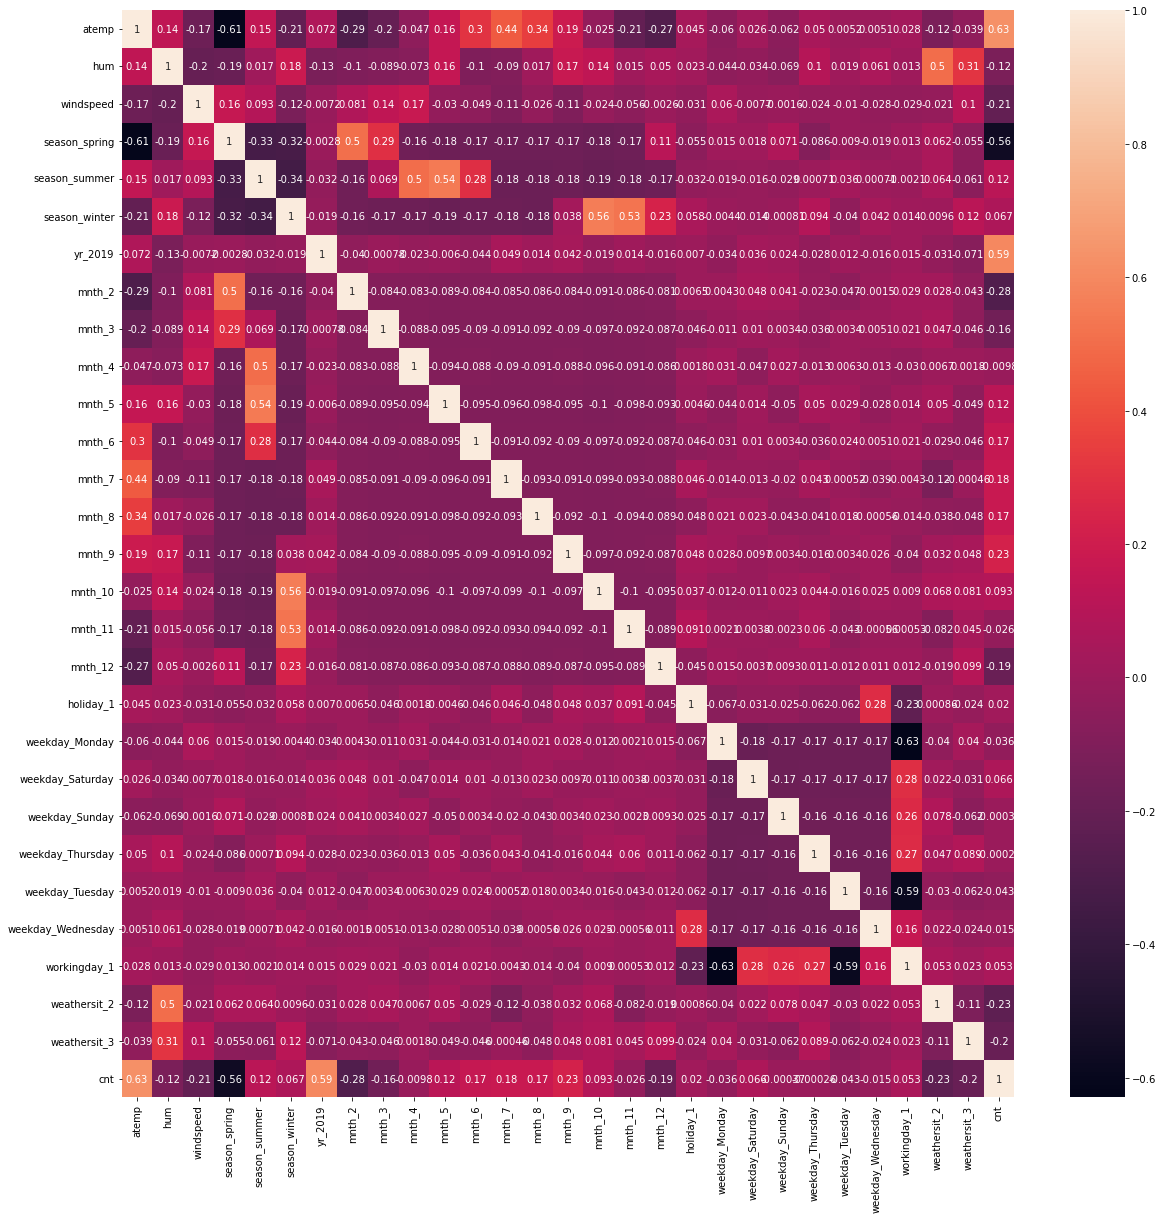

In [36]:
df_corr_check = df_train.copy()
df_corr_check['cnt'] = y_train.values
plt.figure(figsize=(20,20))
sns.heatmap(df_corr_check.corr(), annot=True);

### 5. Let's keep top 8 to 10 variables and try building the model

In [37]:
vif, model = regression_with_n_features(X_train.drop(['hum'], axis=1), 8)
print(model.summary())
vif.T

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     320.7
Date:                Mon, 08 Aug 2022   Prob (F-statistic):          7.75e-192
Time:                        21:24:07   Log-Likelihood:                 485.30
No. Observations:                 511   AIC:                            -952.6
Df Residuals:                     502   BIC:                            -914.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2791      0.020     13.839

,1,0,3,2,6,4,5,7
Features,windspeed,atemp,yr_2019,season_spring,weathersit_2,mnth_9,mnth_10,weathersit_3
VIF,4.48,4.16,1.9,1.6,1.47,1.17,1.15,1.07


__Observarion__: With top 8 variables, all the variables are showing significance and no-multicolliniarity in the data
- __Let's Use this as a final model for prediction__

## Final Model Interpretation:

#### Hypothesis Testing

    - H0:B1=B2=.....=Bn=0
    - H1: at least one Bi!=0 (i = no. of variables)

### Model constant and co-efficient of each variable

In [38]:
Model_coeff = pd.DataFrame()
Model_coeff['variables'] = model.params.index
Model_coeff['Coef'] = model.params.values
Model_coeff.set_index('variables').T

variables,const,atemp,windspeed,season_spring,yr_2019,mnth_9,mnth_10,weathersit_2,weathersit_3
Coef,0.279062,0.378637,-0.088575,-0.16344,0.253157,0.088521,0.073795,-0.091536,-0.284695


### Interpretation of Co-efficients:
- 1) __const:__ In the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rides can still increase by __0.279062__ units.
- 2) __atemp:__ A unit increase in feeling temp variable, increases the bike rides by __0.378637__ units.
- 3) __windspeed:__ A unit increase in windspeed variable, decreases the bike rides by __0.088575__ units.
- 4) __season_spring:__ A unit increase in season_spring variable, decreases the bike rides by __0.16344__ units.
- 5) __yr_2019:__ A unit increase in yr_2019 variable, increases the bike rides by __0.253157__ units.
- 6) __mnth_9 and mnth_10:__ A unit increase in mnth_5, mnth_6, mnth_9 and mnth_10 variables, increases the bike rides by __0.088521 and 0.073795__ units respectively.
- 7) __weathersit_2 and weathersit_3:__ A unit increase in weathersit_2 and weathersit_3 variables, decreases the bike rides by __0.091536 and 0.284695__ units respectively.

### F Statistics
- F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
    - F-statistic: __320.7__
    - Prob (F-statistic): __7.75e-192__
    - The F-Statistics value of 320.7 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

## Residual Analysis of the train data

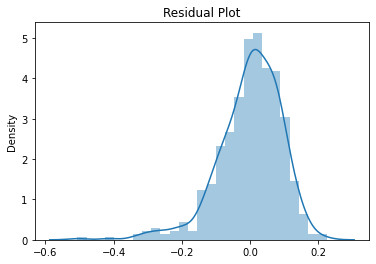

In [39]:
final_variables_used_in_model = model.params.index
X_train = sm.add_constant(X_train)
y_train_predict = model.predict(X_train[final_variables_used_in_model])
residual_train = y_train-y_train_predict
plt.title("Residual Plot")
sns.distplot(residual_train);

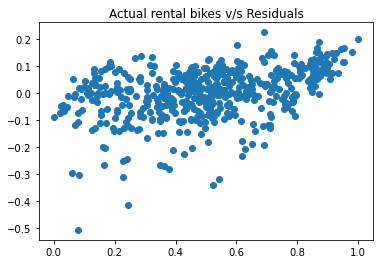

In [40]:
plt.title("Actual rental bikes v/s Residuals")
plt.scatter(y_train, residual_train);

In [41]:
print("Variance Inflation factor - to check multicolliniarity")
vif.T

Variance Inflation factor - to check multicolliniarity


,1,0,3,2,6,4,5,7
Features,windspeed,atemp,yr_2019,season_spring,weathersit_2,mnth_9,mnth_10,weathersit_3
VIF,4.48,4.16,1.9,1.6,1.47,1.17,1.15,1.07


##### Observations:
- Residual plot seems to be normally distributed (very sligtly left skewed)
- No visible pattern observed between dependent variable and residuals
- No multicolliniarity between independent variables (VIF<5)

## Prediction on testing data

In [42]:
df_test = sm.add_constant(df_test)
y_test_predict = model.predict(df_test[final_variables_used_in_model])
residual_test = y_test-y_test_predict

# Model Evaluation

#### 1. Actual rental bikes v/s Predictions

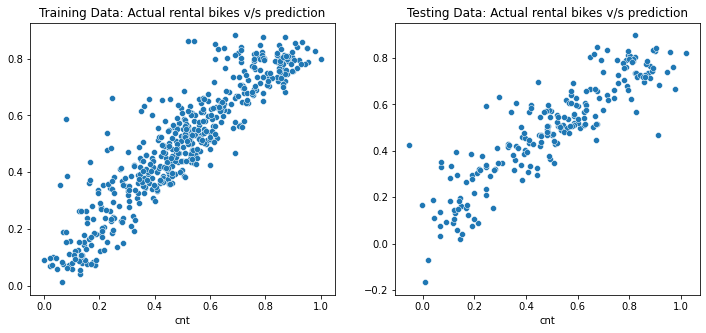

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Training Data: Actual rental bikes v/s prediction")
sns.scatterplot(y_train, y_train_predict)
plt.subplot(1,2,2)
plt.title("Testing Data: Actual rental bikes v/s prediction")
sns.scatterplot(y_test, y_test_predict)
plt.show()

#### 1.1 Residual Plots

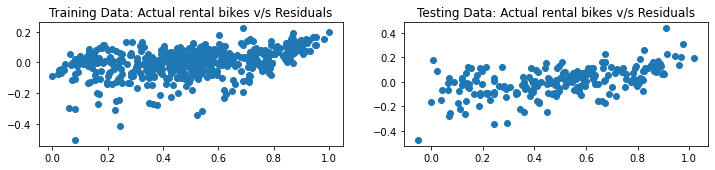

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,3)
plt.title("Training Data: Actual rental bikes v/s Residuals")
plt.scatter(y_train, residual_train);
plt.subplot(2,2,4)
plt.title("Testing Data: Actual rental bikes v/s Residuals")
plt.scatter(y_test, residual_test);
plt.show()

#### 2. Evaluation Metrics

In [45]:
print("\033[1mTraining Data")
print("---------------------------------------------------------------------------------------------")
r2_score_train = r2_score(y_train, y_train_predict)
print("R2 Score:     ",round(r2_score_train*100,2),"%")
print("Adj. R2 Score:",round((1 - (1-r2_score_train)*(len(y_train)-1)/(len(y_train)-10-1))*100,2),"%")
print("RMSE         :",round(np.sqrt(mean_squared_error(y_train, y_train_predict)),4),"\n")

print("\033[1mTesting Data")
print("---------------------------------------------------------------------------------------------")
r2_score_test = r2_score(y_test, y_test_predict)
print("R2 Score:     ",round(r2_score_test*100,2),"%")
print("Adj. R2 Score:",round((1 - (1-r2_score_test)*(len(y_test)-1)/(len(y_test)-10-1))*100,2),"%")
print("RMSE         :",round(np.sqrt(mean_squared_error(y_test, y_test_predict)),4))

Training Data
---------------------------------------------------------------------------------------------
R2 Score:      83.64 %
Adj. R2 Score: 83.31 %
RMSE         : 0.0936 

Testing Data
---------------------------------------------------------------------------------------------
R2 Score:      78.58 %
Adj. R2 Score: 77.55 %
RMSE         : 0.1176


#### Actual scale - predictions

In [46]:
actual_prediction = df_test[['atemp','hum','windspeed']].copy()
actual_prediction['cnt'] = y_test_predict
actual_prediction_rental_bikes = scaler.inverse_transform(actual_prediction)[:,3]
actual_prediction_rental_bikes[:5]

array([1950.80799423, 5457.38390398, 7116.85710902, 3722.54337823,
       6469.31820442])

# Summary:
- Comparing results between train and test data, the trained model can able to generalize the unseen data very well with only consideration of __8 variables__
-  __Top 3__ predictor variables that influences the bike booking:
    - __1. atemp:__ A unit increase in feeling temp variable, increases the bike rides by 0.378637 units.
    - __2. weathersit_3:__ A unit increase in weathersit_3 variable, increases the bike rides by 0.284695 units.
          - weathersit_3: (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
    - __3. yr_2019:__ A unit increase in yr_2019 variable, increases the bike rides by 0.253157 units.
        
##### It is suggested to consider these variables utmost importance while planning, to achive maximum Booking
- In __Jan and Feb__ we can suggest to service the bikes, with out much impacting the business